In [1]:
from Heat_atom_Lap import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


0.0037611481676624436

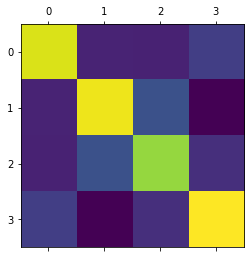

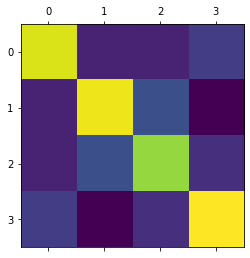

In [2]:
L,L_gt,s0,D = Setup(4)
U,V = Combine([250]*10,3,L,0.001,10)
Lap, Cond = Learn(U,V)
err = (ErrCheck(Lap,L_gt))[2]
err

In [3]:
# condlist = []
# AdjList = []
# for i in range(2,15):
#     L, A_gt, s0,D = Setup(i)
#     Samples, T = CreateNoisySamples(L,s0,0.001,1e-5,10)
#     sk, dk = Resample(3,Samples,0.001)
#     U,V = UVmatrix(T,sk,dk,3,D)
#     Adj, Cond = Learn(U,V)
#     Adj_le, A_gt, err = ErrCheck(Adj, A_gt)
#     err
#     AdjList.append([Adj_le,A_gt])
#     condlist.append(Cond)

In [ ]:
# for k in range():
#     subplot(14,2,k+1)
#     matshow((AdjList[k])[0])

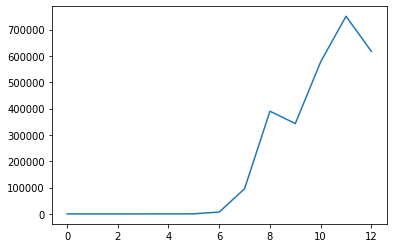

In [12]:
# plot(condlist)

In [3]:
# L, A_gt, s0,D = Setup(10)
# Samples, T = CreateNoisySamples(L,s0,0.001,1e-5,10)
# sk, dk = Resample(3,Samples,0.001)
# U,V = UVmatrix(T,sk,dk,3,D)
# Adj, Cond = Learn(U,V)
# Adj_le, A_gt, err = ErrCheck(Adj, A_gt)
# err

In [ ]:
# L, A_gt, s0,D = Setup(10)
# Samples = Combine([250]*5,L,0.001,10)
# T = sum(1250)
# sk, dk = Resample(3,Samples,0.001)
# U,V = UVmatrix(T,sk,dk,3,D)
# Adj, Cond = Learn(U,V)
# Adj_le, A_gt, err = ErrCheck(Adj, A_gt)
# err

In [ ]:
# L, A_gt, s0,D = Setup(10)
# Samples, T = CreateNoisySamples(L,s0,0.001,1e-5,10)
# sk, dk = Resample(3,Samples,0.001)
# U,V = UVmatrix(T,sk,dk,3,D)
# Adj, Cond = Learn(U,V)
# Adj_le, A_gt, err = ErrCheck(Adj, A_gt)
# err

In [3]:
# class Some_Matrices():
    
#     def vec(A):
#         return A.flatten('F')

#     def E_Matrices(n):
#         I = eye(n)
#         E = {(i,j):dot(I[:,i].reshape(n,1),I[:,j].T.reshape(1,n)) for i in range(n) for j in range(n)}
#         return E

#     def T_Matrices(n):
#         E_inst = Some_Matrices.E_Matrices(n)
#         T = {(i,j): (E_inst[(i,j)] if i == j else E_inst[(i,j)] + E_inst[(j,i)]) for i in range(n) for j in range(n)}
#         return T 
    
#     def u_vecs(n):
#         I_nh = eye(n*(n+1)//2)
#         u = {(i,j): I_nh[:, int((j)*n + (i+1) - 0.5*(j+1)*j -1)] for i in range(n) for j in range(n)}
#         return u 
    
#     def D_Matrix(n):
#         num = n*(n+1)//2
#         DT = zeros((num,n**2))
#         T_inst = Some_Matrices.T_Matrices(n)
#         u_inst = Some_Matrices.u_vecs(n)

#         for j in range(n):
#             for i in range(j,n):
#                 DT = DT + ((u_inst[(i,j)]).reshape(num,1)).dot(((Some_Matrices.vec(T_inst[(i,j)])).T).reshape(1,n**2))
#         D = DT.T
#         return D
    
#     def make_mat(c,n):
#         fullc = zeros((n,n))
#         for i in range(n):
#             fullc[:,i] = c[i:i+n]
#         return fullc

In [13]:
# Dy = Some_Matrices.D_Matrix(4)
# hL = pinv((kron(U.T,eye(4))).dot(Dy)).dot(Some_Matrices.vec(V))
# LL = Some_Matrices.vec(L_gt)
# fullL = Dy.dot(hL)
# LLL = Some_Matrices.make_mat(fullL,4)

In [9]:
import numpy as np

def Elim(n):
    '''
    Arguments:
    n: integer >=2
    Returns:
    Numpy array of dimensions n(n+1)/2 x n**2
    '''
    if type(n) != int:
        print('Incorrect type')
        sys.exit()
    if n <=2 :
        print('n is less than 2')

    k, I = u_vectors(n)

    E =  E_matrices(n)
    p = n*(n+1)//2
    nsquare = n**2
    
    L = np.zeros((p,nsquare))
    for j in range(0,n):
        for i in range(j,n):
            L = L + np.matmul(I[np.ix_(np.arange(0,len(I)),[int(k[i][j])])],
                              E[i][j].reshape((-1,1),order='F').transpose())

    return L


def DD(n):
    '''
    Arguments:
    n: integer >=2
    Returns:
    Numpy array of dimensions n**2 x n(n+1)/2
    '''
    if type(n) != int:
        print('Incorrect type')
        sys.exit()
    if n <=2 :
        print('n is less than 2')
    
    p = n*(n+1)//2
    nsquare = n**2
    Dt = np.zeros((p,nsquare))
    k, I = u_vectors(n)
    T = T_matrices(n)
    for j in range(0,n):
        for i in range(j,n):
            Dt = Dt + np.matmul(I[np.ix_(np.arange(0,len(I)),[int(k[i][j])])],
                              T[i][j].reshape((-1,1),order='F').transpose())
    D = Dt.transpose()
    return D

def T_matrices(n):
    E = E_matrices(n)
    T = list()
    for i in range(0,n):
        T.append(list())
        for j in range(0,n):
            if i==j:
                T[-1].append(E[i][j])
            else:
                T[-1].append(E[i][j] + E[j][i])
    return T
                
def u_vectors(n):
    p = n*(n+1)//2
    I = np.eye(p)
    k = np.zeros((n,n))
    
    for j in range(1,n+1):
        for i in range(j,n+1):
            k[i-1][j-1] = int((j-1)*n + i -0.5*(j)*(j-1)) -1
    return k, I


def E_matrices(n):
    I = np.eye(n)
    #print(I)
    E = list()
    for i in range(0,n):
        E.append(list())
        for j in range(0,n):
            E[-1].append(np.outer(I[i],I[j]))
    return E

def vec(A):
    return A.flatten('F')

In [11]:
Dup = DD(4)
hL = pinv((np.kron(U.T,np.eye(4))).dot(Dup)).dot(vec(V))
Ldone = matricizer2(hL)